In [73]:
import requests
from PIL import Image, ImageDraw, ImageFont
from io import BytesIO

In [74]:
subscription_key = ''
face_api_url = ''

image_url = 'https://image.ajunews.com/content/image/2020/10/19/20201019171653143809.jpg'

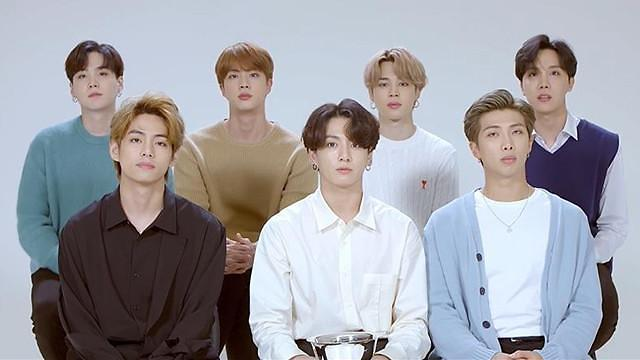

In [75]:
image = Image.open(BytesIO(requests.get(image_url).content))
image

In [76]:
headers = {'Ocp-Apim-Subscription-Key': subscription_key}

In [77]:
params = {
    'returnFaceId': 'false',
    'returnFaceLandmarks': 'false',
    'returnFaceAttributes': 'Smile'
}

In [78]:
data = {'url': image_url}

In [79]:
response = requests.post(face_api_url, params=params, headers=headers,json=data)
faces = response.json()
faces

[{'faceRectangle': {'top': 119, 'left': 480, 'width': 53, 'height': 53},
  'faceAttributes': {'smile': 0.013}},
 {'faceRectangle': {'top': 130, 'left': 318, 'width': 53, 'height': 53},
  'faceAttributes': {'smile': 0.0}},
 {'faceRectangle': {'top': 127, 'left': 121, 'width': 52, 'height': 52},
  'faceAttributes': {'smile': 0.0}},
 {'faceRectangle': {'top': 61, 'left': 520, 'width': 47, 'height': 47},
  'faceAttributes': {'smile': 0.005}},
 {'faceRectangle': {'top': 63, 'left': 223, 'width': 43, 'height': 43},
  'faceAttributes': {'smile': 0.0}},
 {'faceRectangle': {'top': 72, 'left': 372, 'width': 42, 'height': 42},
  'faceAttributes': {'smile': 0.001}},
 {'faceRectangle': {'top': 63, 'left': 72, 'width': 42, 'height': 42},
  'faceAttributes': {'smile': 0.0}}]

In [80]:
draw = ImageDraw.Draw(image)

In [81]:
def DrawBox(faces):
    for face in faces:
        rect = face['faceRectangle']
        left = rect['left']
        top = rect['top']
        width = rect['width']
        height = rect['height']

        draw.rectangle(((left, top), (left+width, top+height)), outline='red')

        face_attributes = face['faceAttributes']
        smile = face_attributes['smile']
        draw.text((left,top), str(smile), fill='red')

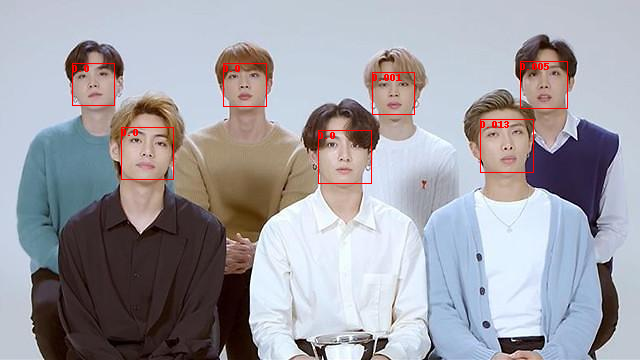

In [82]:
DrawBox(faces)
image